In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [14]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [22]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [23]:
X=df.drop('FWI',axis=1)

In [24]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [25]:
y=df['FWI']

In [8]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [20]:
X_train.shape

(162, 14)

In [27]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.688737,-0.317221,-0.362297,0.688635,0.476914,0.362184,0.587378,0.447887,0.526620,0.293965
RH,-0.688737,1.000000,0.187301,0.201006,-0.648215,-0.394980,-0.216636,-0.701950,-0.341070,-0.457624,-0.376181
Ws,-0.317221,0.187301,1.000000,0.042733,-0.139321,0.033159,0.077861,0.040249,0.055092,-0.060042,-0.150946
Rain,-0.362297,0.201006,0.042733,1.000000,-0.569270,-0.338710,-0.320196,-0.373658,-0.342483,-0.394826,-0.001948
FFMC,0.688635,-0.648215,-0.139321,-0.569270,1.000000,0.609917,0.498209,0.731438,0.592487,0.762120,0.229954
DMC,0.476914,-0.394980,0.033159,-0.338710,0.609917,1.000000,0.879934,0.664657,0.981561,0.588381,0.153804
DC,0.362184,-0.216636,0.077861,-0.320196,0.498209,0.879934,1.000000,0.484383,0.941760,0.475914,-0.107129
ISI,0.587378,-0.701950,0.040249,-0.373658,0.731438,0.664657,0.484383,1.000000,0.627479,0.741899,0.272186
BUI,0.447887,-0.341070,0.055092,-0.342483,0.592487,0.981561,0.941760,0.627479,1.000000,0.579217,0.049625
Classes,0.526620,-0.457624,-0.060042,-0.394826,0.762120,0.588381,0.475914,0.741899,0.579217,1.000000,0.222106


In [28]:
corr=X_train.corr()

<Axes: >

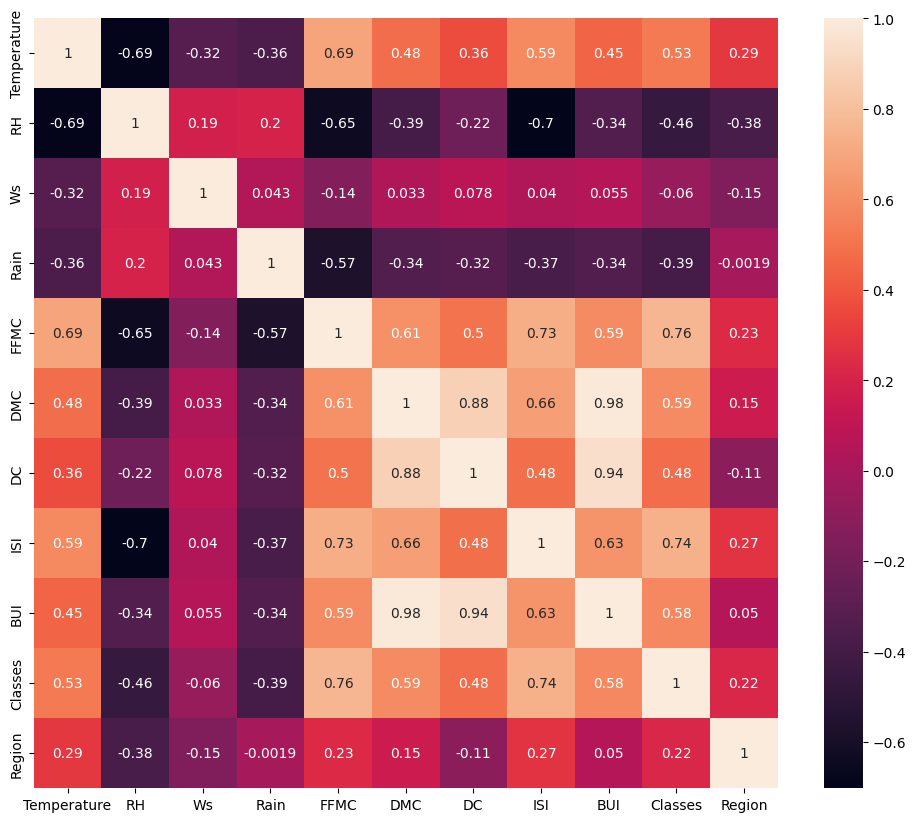

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)

In [31]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features=correlation(X_train,0.85)

In [33]:
corr_features

{'BUI', 'DC'}

In [34]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((162, 9), (81, 9))

## Feature Scaling or Standardization

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

<Axes: >

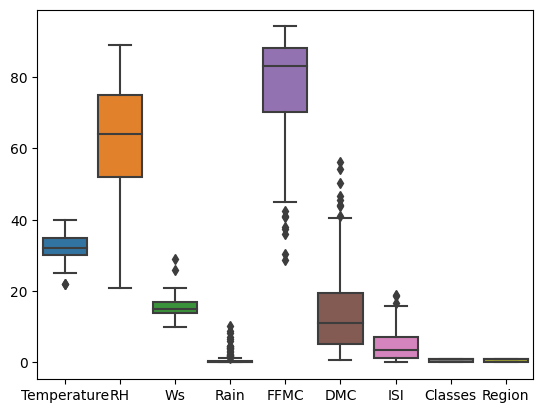

In [38]:
sns.boxplot(X_train)

<Axes: >

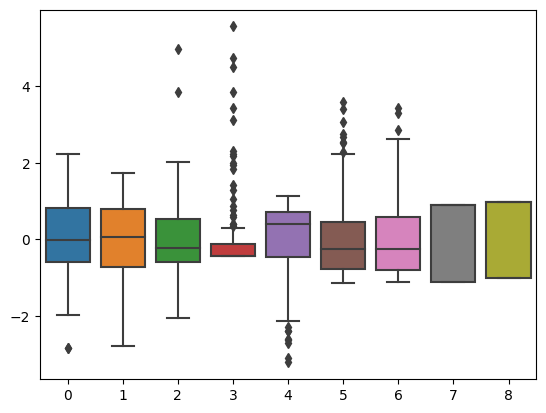

In [39]:
sns.boxplot(X_train_scaled)

## Regression Model

In [40]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,score)

0.6562931843633071 0.9870831620084868


In [47]:
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,score)


1.3199947825749143 0.9489776696889856


In [51]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,score)

0.6781225131218197 0.9863698710809672


In [50]:
en=ElasticNet()
en.fit(X_train_scaled,y_train)
y_pred=en.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,score)

2.02562054995965 0.8818928076695921


In [52]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('regressor.pkl','wb'))